In [0]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'd_pedigree_fn', 'age', 'outcome']
pima = pd.read_csv("diabetes.csv", header = None, names = col_names)
pima = pima.iloc[1:]
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,d_pedigree_fn,age,outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [0]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'd_pedigree_fn', 'age']
X = pima[feature_cols] # features
y = pima.outcome  # target variable

In [0]:
# split X and y into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# the dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

In [0]:
from sklearn.linear_model import LogisticRegression
# instantiate the model
logreg = LogisticRegression(max_iter=10000)
# fit the model with data
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)

In [0]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
#The dimension of this matrix is 2*2 because this model is binary classification.
#You have two classes 0 and 1. Diagonal values represent accurate predictions,
# while non-diagonal elements are inaccurate predictions.
# In the output, 117 and 36 are actual predictions, and 26 and 13 are incorrect predictions.

array([[117,  13],
       [ 26,  36]])

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

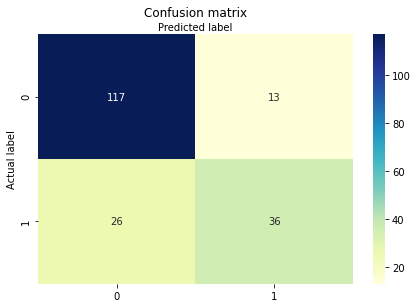

In [0]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='0'))
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label = '1'))

Accuracy:  0.796875
Precision: 0.8181818181818182
Recall: 0.5806451612903226
